In [1]:
import datetime
import os
import re
import requests
import string

import numpy as np

from collections import defaultdict, Counter

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
session = os.getenv('ADVENT_SESSION')

In [3]:
def GetInput(day):
    url = 'https://adventofcode.com/2018/day/{}/input'.format(day)
    cookies = {'session': session}
    r = requests.get(url, cookies=cookies)
    return r.content.decode()
    

def Input(day):
    # Read an input
    filename = 'data/{}.txt'.format(day)

    try:
        f = open(filename)
    except:
        content = GetInput(day)
        f = open(filename, 'w')
        f.write(content)
        f.seek(0)
    return f

def Lines(day):
    # Read the input and convert to an array of strings.
    return Input(day).read().splitlines()

def vector(day):
    # Read the input, and convert it to a vector of numbers
    return list(map(float, Lines(day)))

## Day 1

In [4]:
# Read input
inp = vector(1)
           
# The answer to the first one is just the sum
print(sum(inp))

533.0


In [5]:
# For the second part, use a set to determine if we've seen 
# a frequency before
v = set()
ii = 0
s = 0
found = False
while not found:
    s = s + inp[ii % len(inp)]
    if s in v:
        print("Found freq: {} at iteration {} ({} passes)".format(
                s, ii, ii % len(inp)))
        break
    v.add(s)
    ii = ii + 1

Found freq: 73272.0 at iteration 130408 (528 passes)


## Day 2

In [6]:
def checksum(s):
    cnt = Counter()
    for l in s:
        cnt[l] += 1
    return (2 in cnt.values(), 3 in cnt.values())

assert(checksum('abcdef') == (False, False))
assert(checksum('bababc') == (True, True))
assert(checksum('abbcde') == (True, False))
assert(checksum('abcccd') == (False, True))
assert(checksum('aabcdd') == (True, False))
assert(checksum('abcdee') == (True, False))
assert(checksum('ababab') == (False, True))

inp = Lines(2)

twos = 0
threes = 0

for line in inp:
    cnt = checksum(line)
    if cnt[0]:
        twos += 1
    if cnt[1]:
        threes += 1
        
print('Twos: {}, Threes: {}, Checksum: {}'.format(twos, threes, twos * threes))     

Twos: 245, Threes: 36, Checksum: 8820


In [7]:
def diff(s1, s2):
    count = 0
    for (c1, c2) in zip(s1, s2):
        if c1 != c2:
            count += 1
    return count
    
fline1 = None
fline2 = None
    
for line1 in inp:
    for line2 in inp:
        if diff(line1, line2) == 1:
            fline1 = line1
            fline2 = line2
            break
    if fline1:
        break
        
print(fline1)
print(fline2)

out = ''
for (c1, c2) in zip(fline1, fline2):
    if c1 == c2:
        out += c1
print(out)

bpacnmglhizqygfsjixtlkwudr
bpacnmglhizqygfsjixtukwudr
bpacnmglhizqygfsjixtkwudr


## Day 3

In [8]:
def parse_claim(claim_str):
    ids, rem = claim_str.split('@')
    ids = int(ids.strip('#'))
    coords, size = rem.split(':')
    left, top = map(int, coords.split(','))
    width, height = map(int, size.split('x'))
    return (ids, left, top, width, height)


claims = []
for inp in Lines(3):
    claims.append(parse_claim(inp))
    
fabric = np.zeros((1000, 1000), dtype=np.int32)
for claim in claims:
    ids, left, top, width, height = claim
    fabric[left:left+width, top:top+height] +=  1
print(np.sum(fabric > 1))

119551


In [9]:
for claim in claims:
    ids, left, top, width, height = claim
    section = fabric[left:left+width, top:top+height]
    if np.all(section == 1):
        print(ids)

1124


## Day 4

In [10]:
inp = Lines(4)
r = re.compile('\[(\d+)-(\d+)-(\d+) (\d+):(\d+)\] (.*)')

logs = []
for line in inp:
    m = r.match(line)
    logs.append(m.groups())
logs = sorted(logs)

guards = defaultdict(lambda: {'asleep': [], 'awake': []})
last_guard = -1

for log in logs:
    match = re.search('Guard #(\d*)', log[5])
    if match:
        guard = int(match.group(1))
        last_guard = guard
    if log[5].find('asleep') >= 0:
        guards[last_guard]['asleep'].append(datetime.timedelta(hours=int(log[3]), minutes=int(log[4])))
    if log[5].find('wakes') >= 0:
        guards[last_guard]['awake'].append(datetime.timedelta(hours=int(log[3]), minutes=int(log[4])))
        
for guard, values in guards.items():
    total = datetime.timedelta(0, 0)
    for asleep, awake in zip(values['asleep'], values['awake']):
        total += awake - asleep
    guards[guard]['total'] = total
    
guard_ids = sorted(guards, key=lambda g: guards[g]['total'], reverse=True)
print(guard_ids[0], guards[guard_ids[0]]['total'])

sleepiest = guards[guard_ids[0]]

minutes = np.zeros((1, 60) )
for asleep, awake in zip(sleepiest['asleep'], sleepiest['awake']):
    minutes[0, int(asleep.seconds/60):int(awake.seconds/60)] += 1
    
sleepiest_minute = np.argmax(minutes)

print(guard_ids[0], sleepiest_minute, guard_ids[0] * sleepiest_minute)

2441 8:08:00
2441 39 95199


In [11]:
array = np.zeros((len(guard_ids), 60), dtype=np.int32)

for ii, guard in enumerate(guard_ids):
    for asleep, awake in zip(guards[guard]['asleep'], guards[guard]['awake']):
        array[ii, int(asleep.seconds/60):int(awake.seconds/60)] += 1
m = np.max(array)
x, y = np.where(array == m)
int(guard_ids[x[0]]) * y[0]

7887

## Day 5

In [12]:
inp = Lines(5)[0]

def process(inp):
    inp = list(inp)
    ii = 0
    while ii < len(inp) - 1:
        c = inp[ii]
        cn = inp[ii+1]

        if c.lower() == cn.lower() and c != cn:
            inp.pop(ii)
            inp.pop(ii)
            ii = max([ii - 2, 0])
        else:
            ii += 1
    return ''.join(inp)
        
print(process('dabAcCaCBAcCcaDA'))
print(len(process(inp)))

dabCBAcaDA
9462


In [13]:
lens = {}

for unit in string.ascii_lowercase:
    new_inp = inp.replace(unit, '')
    new_inp = new_inp.replace(unit.upper(), '')
    lens[unit] = len(process(new_inp))
keys = sorted(lens, key=lambda char: lens[char])

print(keys[0], lens[keys[0]])

m 4952


## Day 6

(47, 4016)


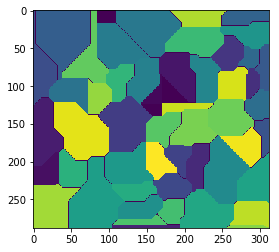

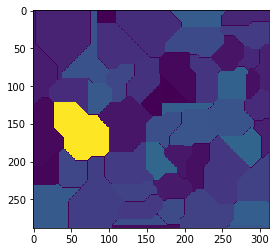

In [14]:
coords = []
for line in Lines(6):
    coords.append(list(map(int, line.split(','))))
coords = np.array(coords, dtype=np.int)
    
dims = np.max(coords, axis=0) - np.min(coords, axis=0)
coords = coords - np.min(coords, axis=0)
data = np.zeros(dims)

for ii in range(0, dims[0]):
    for jj in range(0, dims[1]):
        dists = np.sum(np.abs(coords - np.array((ii, jj))), axis=1)
        m = np.min(dists)
        if np.sum(dists == m) > 1:
            data[ii, jj] = -1
            continue
        else:
            data[ii,jj] = np.argmin(dists)

# Create a mask of the boundary pixels
mask = np.ones(dims, dtype=np.bool)
mask[1:-2, 1:-2] = False

areas = []
for ii in range(0, len(coords)):
    # Clip the region against the boundary, if it intersects
    # Then it must be infinite and throw it out
    if np.sum(np.bitwise_and(data == ii, mask)) > 1:
        continue
    areas.append((ii, np.sum(data == ii)))
    
areas = sorted(areas, key=lambda a: a[1], reverse=True)
print(areas[0])

imshow(data)
figure()
data[data == areas[0][0]] = 150
imshow(data)

46306


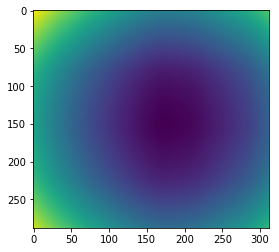

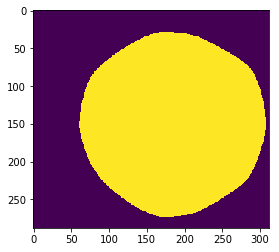

In [15]:
data = np.zeros(dims)

for ii in range(0, dims[0]):
    for jj in range(0, dims[1]):
        dists = np.sum(np.abs(coords - np.array((ii, jj))), axis=1)
        data[ii, jj] = np.sum(dists)
imshow(data)
figure()
imshow(data < 10000)
print(np.sum(data < 10000))